In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


** Возьмём данные за апрель **

In [2]:
data = pd.read_csv('aggregate_yellow_tripdata_2016-04.csv', parse_dates=['hour'],
                   dtype={"area": int16, "trip_count": float32}
                  )
data.head()

,hour,area,trip_count
0,2016-04-01,1,0.0
1,2016-04-01,2,0.0
2,2016-04-01,3,0.0
3,2016-04-01,4,0.0
4,2016-04-01,5,0.0


In [3]:
print data.hour.min(), '-', data.hour.max()

2016-04-01 00:00:00 - 2016-04-30 23:00:00


** Регионы у которых среднее количество поездок в Мае >= 5. **

In [4]:
reg = pd.read_csv('Regions_more_then_5_trips.csv', header = 0, 
                  dtype={"area": int16}
                 )
reg.head()

,area
0,1075
1,1076
2,1077
3,1125
4,1126


In [5]:
result = reg.merge(data, left_on='area', right_on='area', how='inner')
result.head()

,area,hour,trip_count
0,1075,2016-04-01 00:00:00,46.0
1,1075,2016-04-01 01:00:00,25.0
2,1075,2016-04-01 02:00:00,12.0
3,1075,2016-04-01 03:00:00,8.0
4,1075,2016-04-01 04:00:00,9.0


In [6]:
result.to_csv('data_april.csv', index=False)

In [7]:
result = pd.read_csv('data_april.csv', parse_dates=['hour'], dtype={"area": int16, "trip_count": float32})
result.head()

,area,hour,trip_count
0,1075,2016-04-01 00:00:00,46.0
1,1075,2016-04-01 01:00:00,25.0
2,1075,2016-04-01 02:00:00,12.0
3,1075,2016-04-01 03:00:00,8.0
4,1075,2016-04-01 04:00:00,9.0


# 1
** Данные о поездках в виде таблицы, по строкам время, а по столбцам идентификатор ячейки. **

In [6]:
pivot = result.pivot(index='hour', columns='area', values='trip_count')
pivot.head()

area,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
hour,,,,,,,,,,,,,,,,,,,,,
2016-04-01 00:00:00,46.0,55.0,31.0,67.0,171.0,300.0,521.0,603.0,716.0,161.0,...,4.0,0.0,2.0,158.0,50.0,104.0,14.0,175.0,53.0,96.0
2016-04-01 01:00:00,25.0,44.0,16.0,46.0,90.0,228.0,325.0,436.0,598.0,121.0,...,8.0,0.0,4.0,3.0,16.0,67.0,14.0,165.0,13.0,68.0
2016-04-01 02:00:00,12.0,23.0,13.0,20.0,58.0,146.0,177.0,299.0,557.0,55.0,...,9.0,0.0,0.0,0.0,1.0,18.0,2.0,26.0,0.0,7.0
2016-04-01 03:00:00,8.0,9.0,4.0,20.0,32.0,141.0,70.0,164.0,498.0,52.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0
2016-04-01 04:00:00,9.0,13.0,4.0,16.0,33.0,115.0,55.0,129.0,239.0,21.0,...,8.0,1.0,3.0,3.0,2.0,1.0,0.0,10.0,0.0,1.0


# 2
** Стандартизируем столбцы **

In [7]:
std_pivot = pivot.apply(lambda x: (x-x.mean()) / x.std())
std_pivot.head()

area,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
hour,,,,,,,,,,,,,,,,,,,,,
2016-04-01 00:00:00,-0.514661,-1.030331,-0.999112,-0.047033,-0.243696,0.090810,1.220538,1.179636,1.178310,0.316702,...,-0.234425,-0.923901,-0.790044,-0.311282,-0.922535,0.237346,0.515471,0.485838,0.853682,0.858107
2016-04-01 01:00:00,-1.034444,-1.162729,-1.245947,-0.582928,-1.049657,-0.413917,0.091665,0.367612,0.705271,-0.237868,...,0.569317,-0.923901,-0.263592,-1.357705,-1.180686,-0.396846,0.515471,0.354919,-0.675871,0.100423
2016-04-01 02:00:00,-1.356215,-1.415489,-1.295314,-1.246417,-1.368062,-0.988744,-0.760749,-0.298539,0.540910,-1.152909,...,0.770253,-0.923901,-1.316496,-1.377958,-1.294577,-1.236722,-1.006110,-1.464860,-1.172976,-1.550245
2016-04-01 03:00:00,-1.455221,-1.583996,-1.443415,-1.246417,-1.626766,-1.023794,-1.377021,-0.954965,0.304391,-1.194502,...,-0.234425,-0.923901,-0.790044,-1.377958,-1.302170,-1.545247,-1.259707,-1.726698,-1.172976,-1.712606
2016-04-01 04:00:00,-1.430470,-1.535851,-1.443415,-1.348492,-1.616815,-1.206057,-1.463415,-1.125150,-0.733890,-1.624293,...,0.569317,-0.848957,-0.526818,-1.357705,-1.286984,-1.528107,-1.259707,-1.674331,-1.172976,-1.712606


# 3 
** Кластеризация **

** Построим дендрограмму чтобы подобрать число кластеров **

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


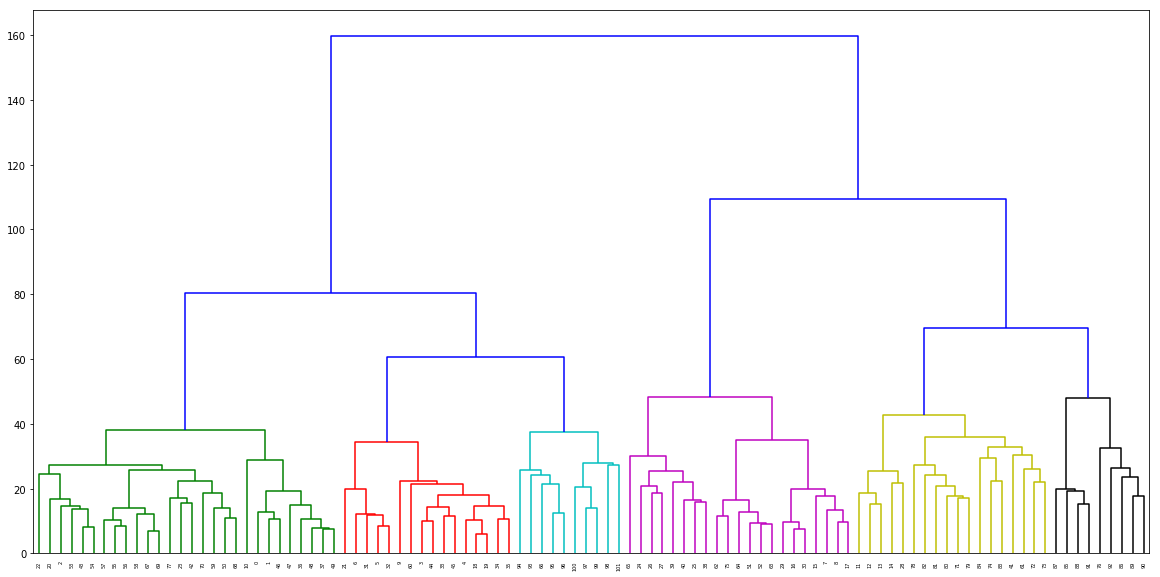

In [9]:
%pylab inline
plt.figure(figsize(20,10))

Z = linkage(std_pivot.transpose(), 'ward')
dendrogram(Z, color_threshold=50)

plt.show()

** Судя по дендрограмме видно что выделяются 6 кластеров **

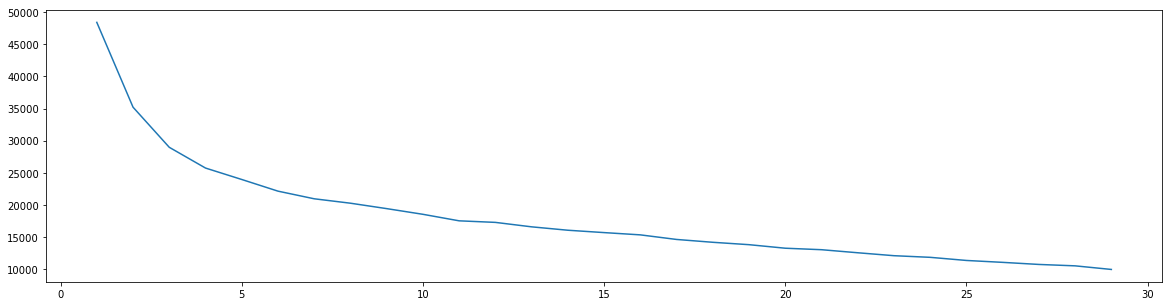

In [10]:
plt.figure(figsize(20, 5))
max_size = 30
temp = [(KMeans(k).fit(std_pivot.T)).inertia_ for k in range(1, max_size)]
plt.plot(range(1, max_size), temp);

** Судя по графику уже при 7 кластерах нет существенного улучшения кластеризации, исходя из этого количеств кластеров равное 6 подходит для кластеризации. Но из-за ограниченности ресурсов возьмём количество кластеров равное 3.**

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(std_pivot.T)

In [12]:
# Соответствие регионов кластерам
clusters_dict = {}
for name, cluster_id in zip(std_pivot, kmeans.labels_):
    clusters_dict[name] = cluster_id
    
#clusters_dict = {name:cluster_id for name, cluster_id in zip(std_pivot, kmeans.labels_)}

**Посмотрим распределение кластеров на карте **

In [13]:
regions=pd.read_csv('regions.csv', sep=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [14]:
west = regions.west.min()
east = regions.east.max()
south = regions.south.min()
north = regions.north.max()
print 'west', west, 'east', east,'south', south,'north', north

longitude = sorted(list(set(regions.west) | set(regions.east)))
latitude = sorted(list(set(regions.south) | set(regions.north)))

center = [(south + north) / 2, (west + east) / 2]
print 'center', center

west -74.25559 east -73.70001 south 40.49612 north 40.91553
center [40.705824999999997, -73.977800000000002]


In [15]:
# Статическая карта, заменена на интерактивную !!!
#import warnings
#base = []
#for i in xrange(1,2501):
#    if i in clusters_dict: 
#        base.append(clusters_dict[i]+1)
#    else: 
#        base.append(0)
#base = np.array(base).reshape((50,50)).transpose()
#
#from mpl_toolkits.basemap import Basemap
#warnings.filterwarnings('ignore')
#
#fig = plt.figure(figsize=(20,20))
#m = Basemap(llcrnrlat=south, urcrnrlat=north,
#            llcrnrlon=west, urcrnrlon=east, epsg=2829)
#m.arcgisimage(xpixels = 1000,ypixels = 1000)
#m.pcolormesh(longitude, 
#             latitude, 
#             base,
#             latlon=True, alpha=.5, zorder=2)
#plt.show()

In [16]:
from geojson import (Polygon, FeatureCollection, Feature)
import folium

In [17]:
color_k7 = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

In [18]:
def color_function(feature, color):
    colors = color
    cluster_index = feature.id
    return matplotlib.colors.cnames[colors[cluster_index]]

In [19]:
foliumMap = folium.Map(location=center, zoom_start=11)

In [20]:
rect_list = []
for index, row in regions.iterrows():
    if index in clusters_dict:
        cluster_index = clusters_dict[index]
        
        y0, x0, y1, x1 = row['south'], row['east'], row['north'], row['west']
        p = Polygon([[(x0, y0), (x0, y1), (x1, y1), (x1, y0)]])
        f = Feature(geometry=p, id=int(cluster_index))
        rect_list.append(f)
fc = FeatureCollection(rect_list)

folium.GeoJson(
    fc, 
    style_function=lambda feature: {
        'fillColor': color_function(feature, color_k7),
        'color': 'white',
        'weight': 0.1,
        'fillOpacity': 0.5,
    }
).add_to(foliumMap)

foliumMap

** При К = 3 кластеризация выглядет неплохо, хотя бы потому что аэропорты вошли в один кластер  **

** Построим графики стандартизованных рядов каждого кластера **

In [21]:
clusters = 3

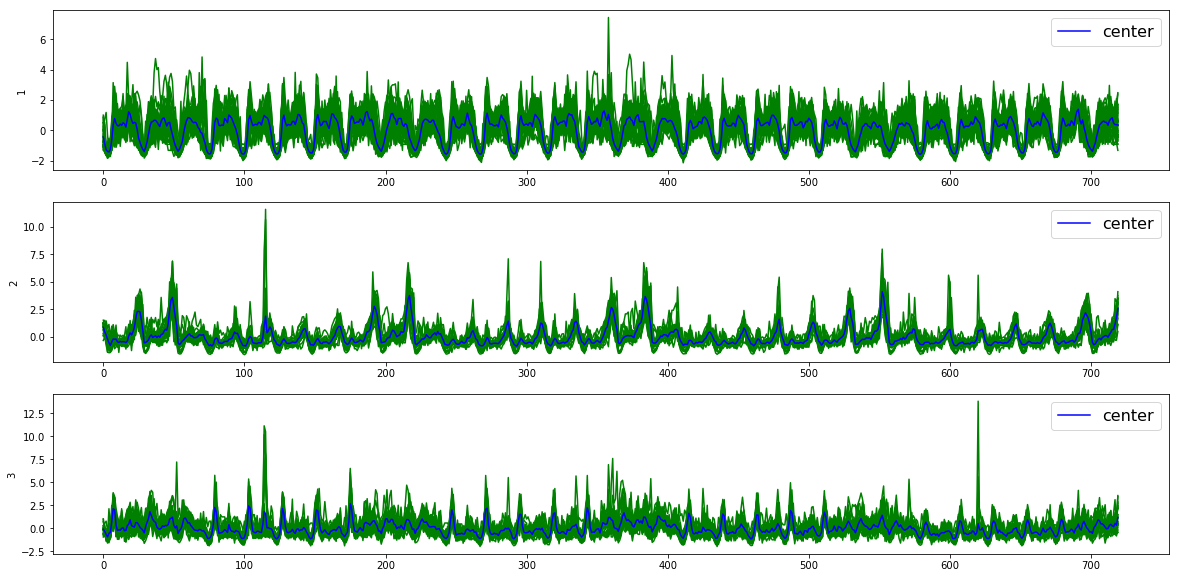

In [22]:
plt.figure(figsize=(20, 10))
for k, d in zip(kmeans.labels_, std_pivot.columns):
    ax = plt.subplot(clusters,1,k+1)
    ax.set_ylabel(k+1)
    plt.plot(std_pivot[d].values,'g')

for c in range(len(kmeans.cluster_centers_)):
    ax = plt.subplot(clusters,1,c+1)
    plt.plot(kmeans.cluster_centers_[c],'b', label = 'center')
    plt.legend(loc=1,prop={'size':16})

In [23]:
for i, label in enumerate(np.unique(kmeans.labels_)):
    num_rows = (kmeans.labels_ == label).sum()
    print '{} ряда(ов) в {} кластере'.format(num_rows, i+1)

53 ряда(ов) в 1 кластере
23 ряда(ов) в 2 кластере
26 ряда(ов) в 3 кластере


** Кластеризованные ряды похожи друг на друга **

# 4
** В каждом кластере выберем наиболее типичный ряд - ближайший к центру кластера **

In [24]:
#Если брать центры кластеров
#cluster_data = pd.DataFrame(kmeans.cluster_centers_.transpose(),index=pd.date_range(std_pivot.index[0],\
#                            periods=std_pivot.shape[0],freq='H'),columns=['cluster'+ str(k+1) for k in range(clusters)])
#plt.figure(figsize=(20, 10))
#for c, col in zip(range(clusters), cluster_data.columns):
#    ax = plt.subplot(clusters,1,c+1)
#    ax.set_ylabel(c+1)
#    plt.plot(cluster_data[col],color='b')

** Ближайшие ряды к центрам кластеров **

In [25]:
central_area = []
for center in kmeans.cluster_centers_:
    min_dist = float('inf')
    for area in std_pivot.columns:
        dist = np.linalg.norm(center -  std_pivot[area].values)
        if dist < min_dist:
            min_dist = dist
            min_area = area
    central_area.append(min_area)
print 'Ближайшие ряды к центрам кластеров ', central_area

Ближайшие ряды к центрам кластеров  [1285, 1177, 1387]


** Центры кластеров и ближайшие ряды **

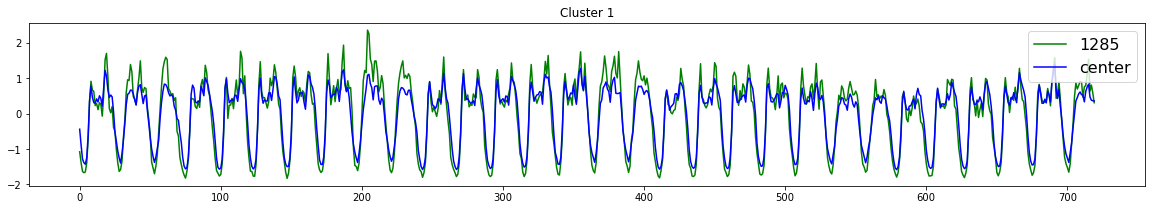

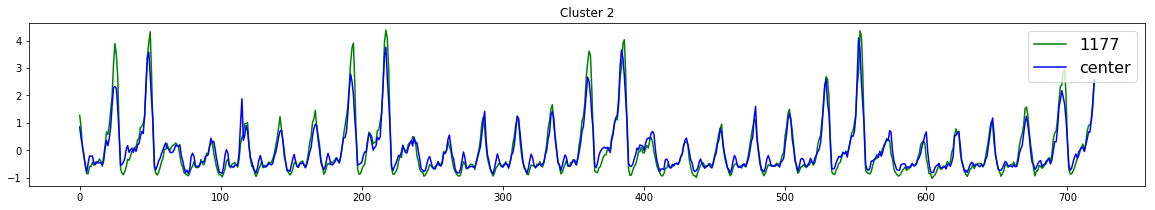

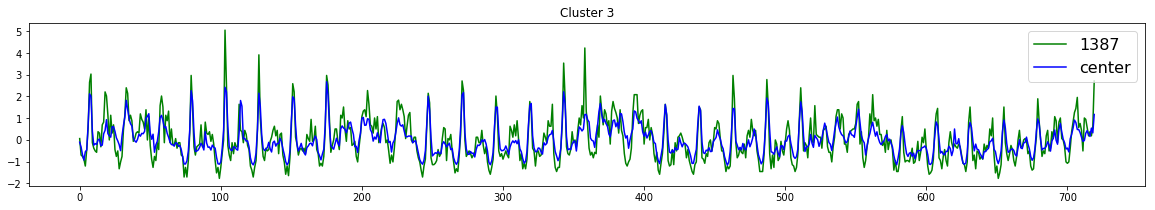

In [26]:
for i, central in enumerate(central_area):
    plt.figure(figsize=(20,3))
    plt.plot(std_pivot[central].values,'g', label = '{}'.format(central))
    plt.plot(kmeans.cluster_centers_[i],'b', label = 'center')
    
    plt.title('Cluster {}'.format(i+1))
    plt.legend(loc=1,prop={'size':16})

По графикам видно что ряды очень похожи на центры кластеров

# 5
**Признаки и параметры модели**

In [27]:
def regression_features_plus(data, num):
    K = num
    T = data.shape[0]
    p = 2.*np.pi/168.
    for i in range(1, K+1):
        phi = p*i
        data['w'+str(i)+'_sin'] = np.sin(np.arange(T)*phi)
        data['w'+str(i)+'_cos'] = np.cos(np.arange(T)*phi)
    
    # Будни и выходные
    data['weekday'] = data.index.weekday
    data['weekend'] = data['weekday'].isin([5, 6]).astype(int)
    
    # Дни недели
    for i in range(7):
        data['dayofweek_{}'.format(i)] = data['weekday'].isin([i]).astype(int)

In [28]:
regression_features_plus(pivot, 2)

In [29]:
f_list = [['w2_sin', 'w2_cos'],
          ['w2_sin', 'w2_cos', 'weekend'],
          ['w2_sin', 'w2_cos', 'weekend', 'dayofweek_0','dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
           'dayofweek_5', 'dayofweek_6']]

In [30]:
import statsmodels.formula.api as smf

In [ ]:
def DPR_plus(Data, features_list):
    for feature in features_list:
        model = smf.ols('trip_count ~ ' + ' + '.join(feature), data=Data)
        reg_model = model.fit()
        predictions = pd.Series(reg_model.predict(), index=Data.index)
        residuals = reg_model.resid
        
        plt.figure(figsize=(20,5))
        plt.plot(Data.trip_count, label='Data', color ='lightblue')
        plt.plot(predictions, label='Predictions', color='green')        
        plt.plot(residuals, label='Residuals', color='red')
        plt.title('({})'.format(feature))
        plt.legend(loc=1,prop={'size':16})

/home/nik/yes/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


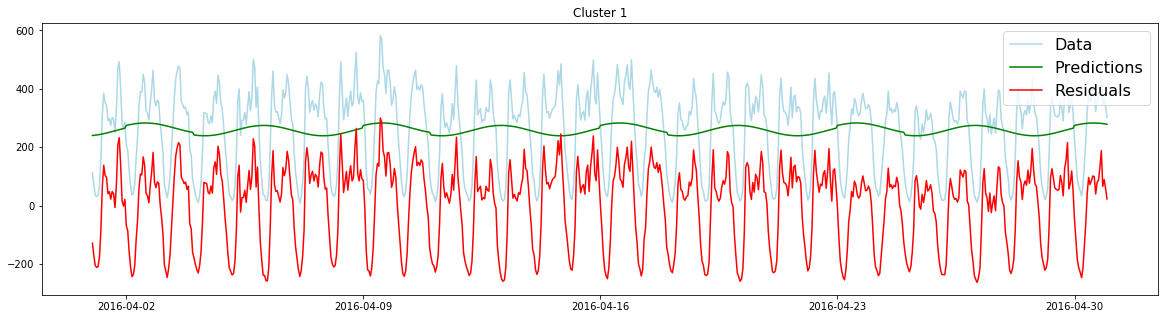

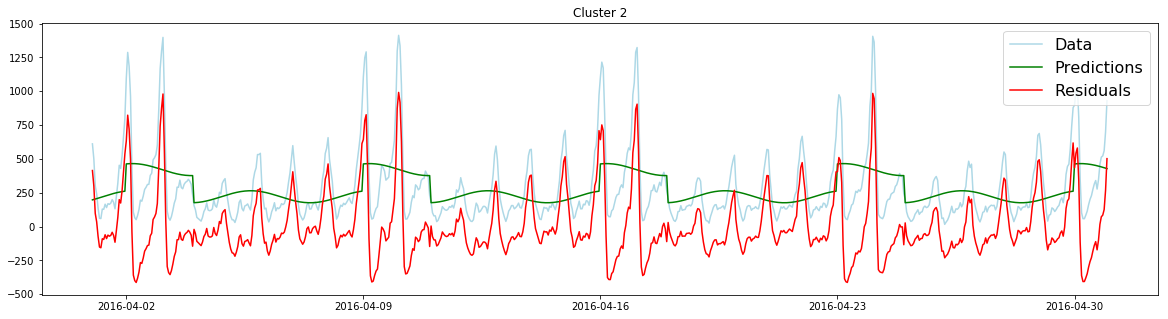

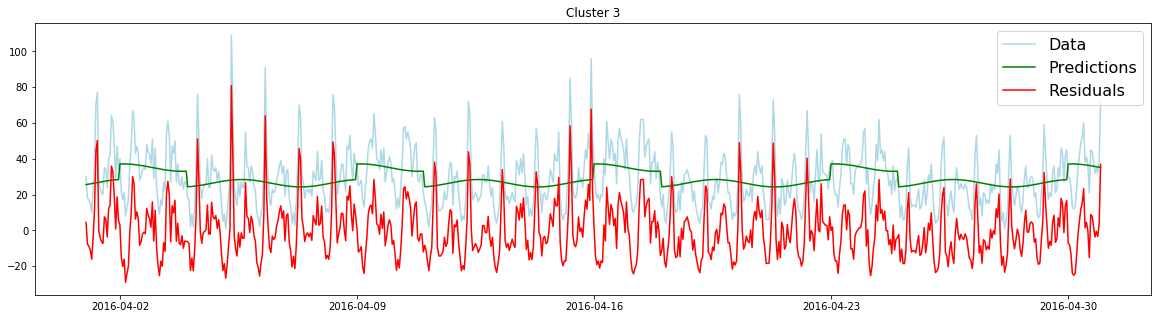

In [31]:
for i, area in enumerate(central_area):
    pivot['target'] = pivot[area]
    model = smf.ols('target ~ ' + ' + '.join(f_list[1]), data=pivot)
    reg_model = model.fit(cov_type='HC1')
    predictions = pd.Series(reg_model.predict(), index=pivot.index)
    residuals = reg_model.resid
        
    plt.figure(figsize=(20,5))
    plt.plot(pivot[area], label='Data', color ='lightblue')
    plt.plot(predictions, label='Predictions', color='green')        
    plt.plot(residuals, label='Residuals', color='red')
    plt.title('Cluster {}'.format(i+1))
    plt.legend(loc=1,prop={'size':16})   

In [32]:
import statsmodels.api as sm

Ячейка - 1285, критерий Дики-Фуллера: p=3.984585e-06
Ячейка - 1177, критерий Дики-Фуллера: p=1.058007e-01
Ячейка - 1387, критерий Дики-Фуллера: p=3.241942e-04


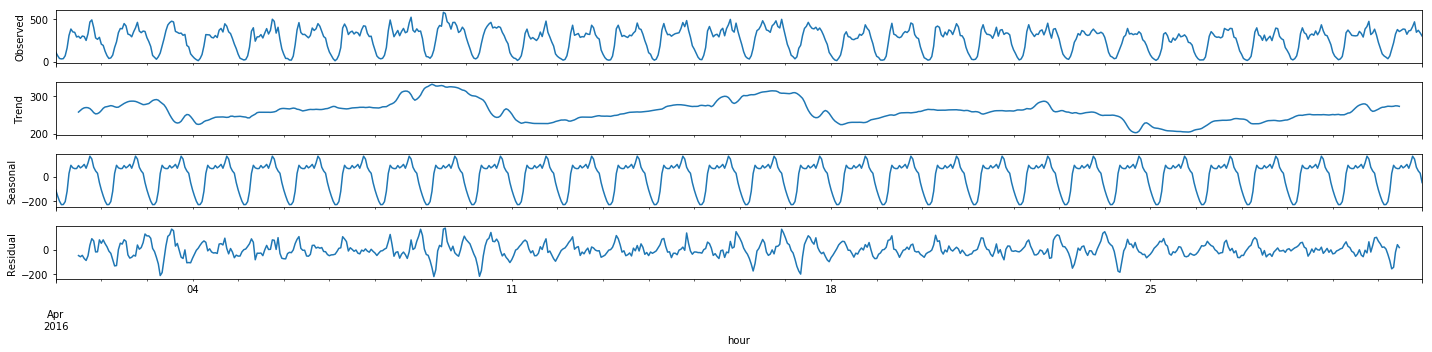

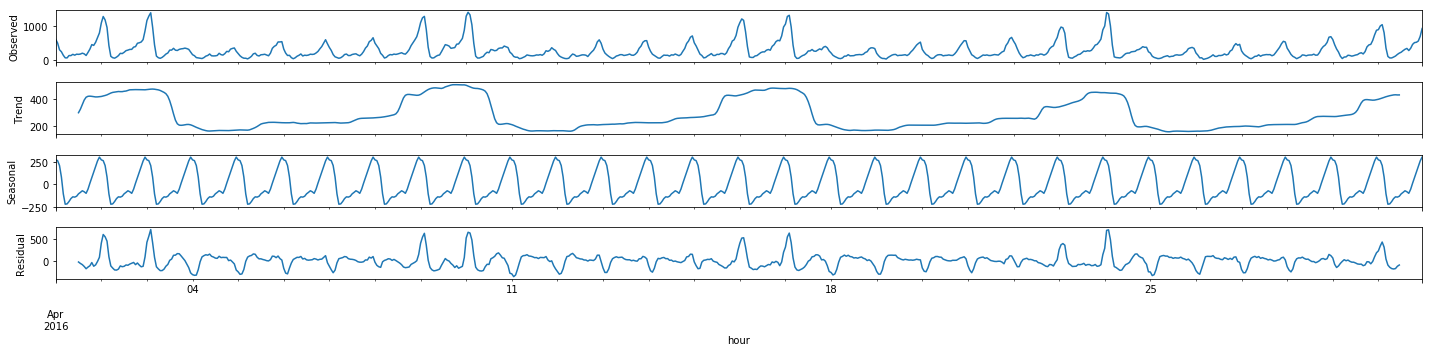

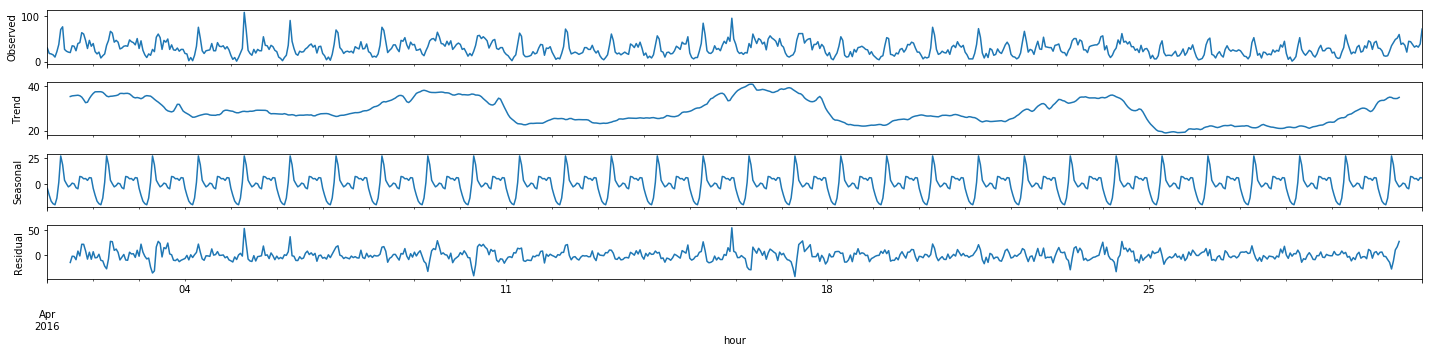

In [33]:
for i, area in enumerate(central_area):
    #print('Cluster {}'.format(i+1))
    sm.tsa.seasonal_decompose(pivot[area]).plot()
    print("Ячейка - {}, критерий Дики-Фуллера: p={:e}".format(area, sm.tsa.stattools.adfuller(std_pivot[area])[1]))

Ячейка - 1285, критерий Дики-Фуллера: p=1.378157e-22
Ячейка - 1177, критерий Дики-Фуллера: p=4.364816e-19
Ячейка - 1387, критерий Дики-Фуллера: p=1.137878e-27


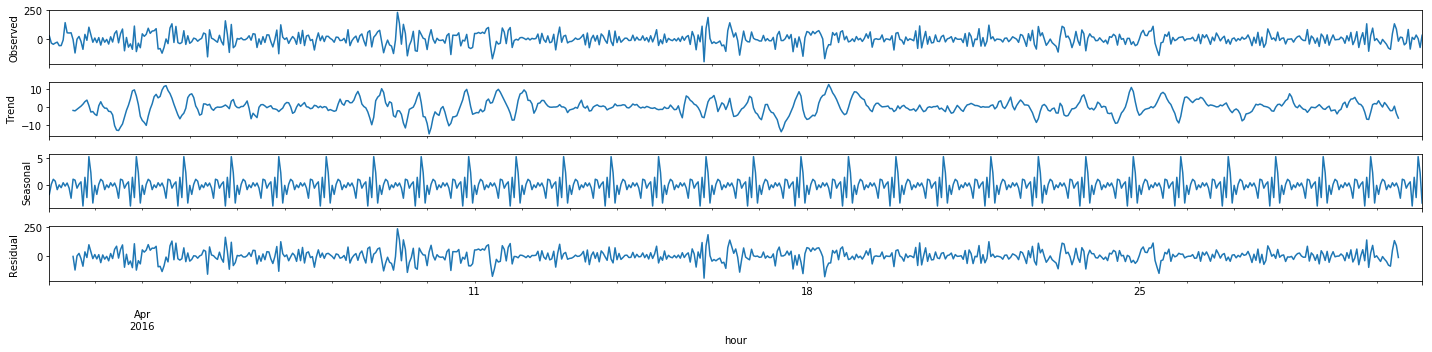

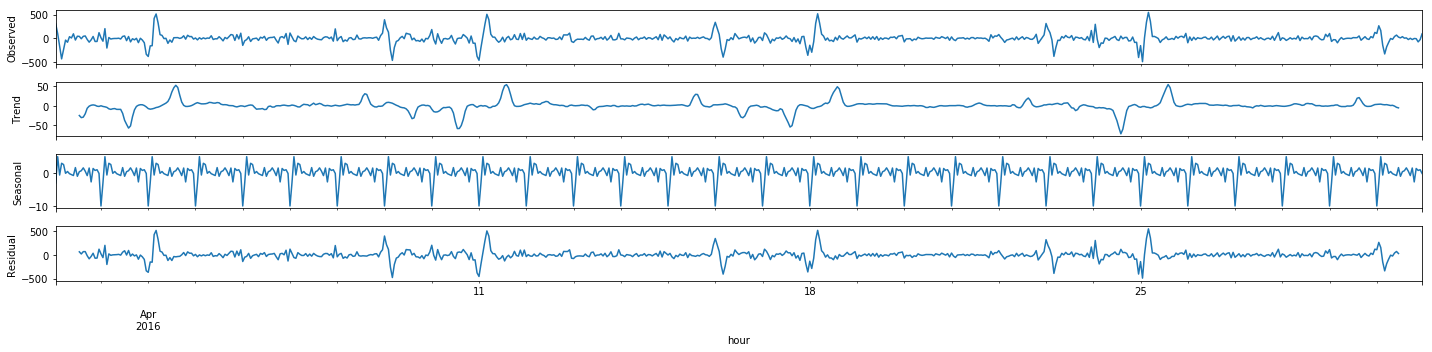

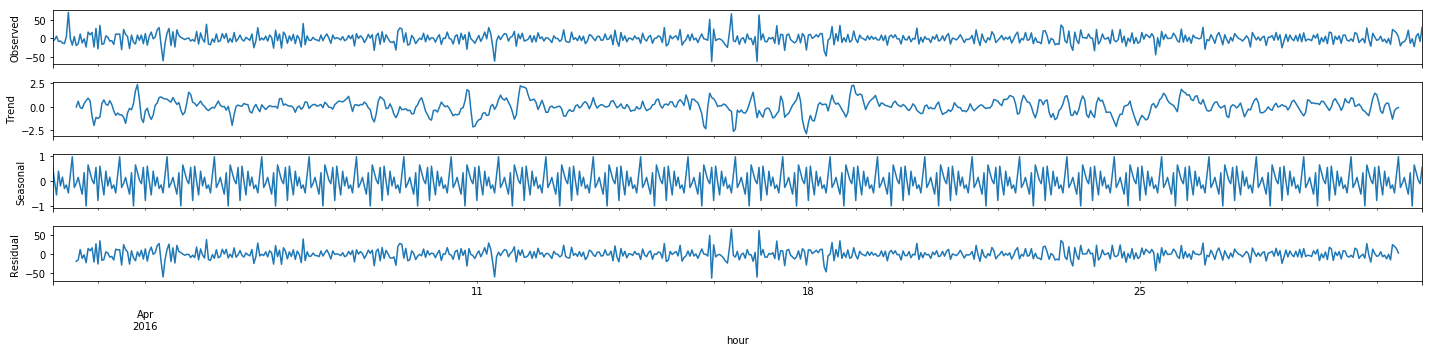

In [34]:
D = 1
S = 24
d = 1
lag = 1

for i, area in enumerate(central_area):
    pivot[str(area) + '_diff_24'] = pivot[area] - pivot[area].shift(S)
    pivot[str(area) + '_diff_1'] = pivot[str(area) + '_diff_24'] - pivot[str(area) + '_diff_24'].shift(lag)
    sm.tsa.seasonal_decompose(pivot[str(area) + '_diff_1'][(S + lag):]).plot()
    print("Ячейка - {}, критерий Дики-Фуллера: p={:e}"
          .format(area, sm.tsa.stattools.adfuller(pivot[str(area) + '_diff_1'][(S + lag):])[1]))

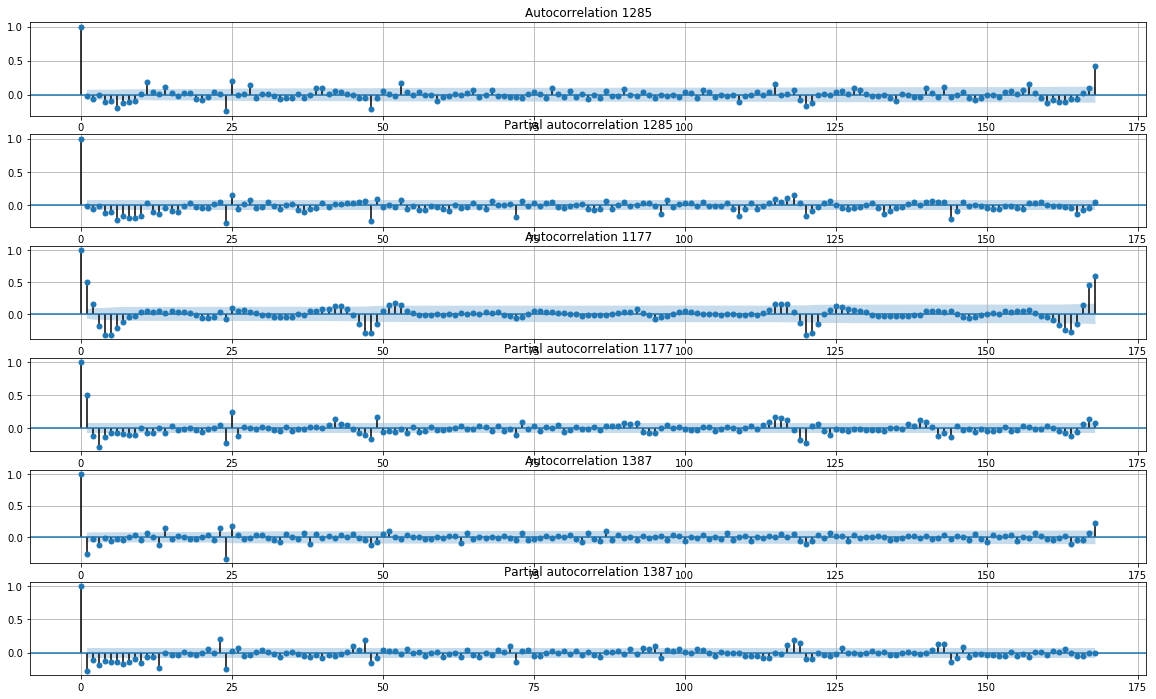

In [35]:
n = 2 * len(central_area)
fig, ax = plt.subplots(n, figsize=(20, n * 2))
for i, area in enumerate(central_area):
    sm.graphics.tsa.plot_acf(pivot[str(area) + '_diff_1'][(S + lag):].values.squeeze(), lags=168,
                             title='Autocorrelation ' + str(area), ax=ax[2 * i])
    ax[2 * i].grid(True)
    sm.graphics.tsa.plot_pacf(pivot[str(area) + '_diff_1'][(S + lag):].values.squeeze(), lags=168,
                             title='Partial autocorrelation ' + str(area), ax=ax[2 * i + 1])
    ax[2 * i + 1].grid(True)

** Вычислительные ресурсы не позволяют взять необходимое количество параметров, поэтому возьмём по минимуму**

In [39]:
from itertools import product

D, d = 1, 1

P, p = 0, 1
Ps = range(0, P+1)
ps = range(0, p+1)

Q, q = 1, 2
Qs = range(0, Q+1)
qs = range(0, q+1)

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

12

In [37]:
%%time
results = {}
best_aic = {}
best_param = {}
best_model = {}
warnings.filterwarnings('ignore')

for i, area in enumerate(central_area):
    
    results[area] = []
    best_aic[area] = float("inf")

    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model=sm.tsa.statespace.SARIMAX(endog=pivot[area], exog=pivot[f_list[1]], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], S)).fit(disp=-1)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters for {} (ValueError):'.format(area), param)
            continue
        except LinAlgError:
            print('wrong parameters for {} (LinAlgError):'.format(area), param)
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic[area]:
            best_model[area] = model
            best_aic[area] = aic
            best_param[area] = param
        results[area].append([param, model.aic])
    
warnings.filterwarnings('default')

('wrong parameters for 1285 (ValueError):', (0, 0, 0, 0))
('wrong parameters for 1177 (ValueError):', (0, 0, 0, 0))
('wrong parameters for 1387 (ValueError):', (0, 0, 0, 0))
CPU times: user 11min 14s, sys: 43.6 s, total: 11min 57s
Wall time: 7min 15s


** Без exog **

In [45]:
%%time
results = {}
best_aic = {}
best_param = {}
best_model = {}
warnings.filterwarnings('ignore')

for i, area in enumerate(central_area):
    
    results[area] = []
    best_aic[area] = float("inf")

    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model=sm.tsa.statespace.SARIMAX(endog=pivot[area], 
                                            order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], S)).fit(disp=-1)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters for {} (ValueError):'.format(area), param)
            continue
        except LinAlgError:
            print('wrong parameters for {} (LinAlgError):'.format(area), param)
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic[area]:
            best_model[area] = model
            best_aic[area] = aic
            best_param[area] = param
        results[area].append([param, model.aic])
    
warnings.filterwarnings('default')

('wrong parameters for 1285 (ValueError):', (0, 0, 0, 0))
('wrong parameters for 1177 (ValueError):', (0, 0, 0, 0))
('wrong parameters for 1387 (ValueError):', (0, 0, 0, 0))
CPU times: user 4min 38s, sys: 6.96 s, total: 4min 45s
Wall time: 2min 39s


**Модели с минимальными значением AIC**

In [46]:
for i, area in enumerate(central_area):
    result_table = pd.DataFrame(results[area])
    result_table.columns = ['parameters', 'aic']
    print 'Кластер {}, ряд - '.format(i+1), area, '\n', (result_table.sort_values(by = 'aic', ascending=True).head(1)), '\n'

Кластер 1, ряд -  1285 
      parameters          aic
10  (1, 2, 0, 1)  7159.649293 

Кластер 2, ряд -  1177 
      parameters          aic
10  (1, 2, 0, 1)  7902.846338 

Кластер 3, ряд -  1387 
     parameters          aic
8  (1, 1, 0, 1)  5208.675083 



**Сохраним наилучшие параметры для дальнейшего использования**

In [47]:
import pickle

In [48]:
with open('best_param.pkl', 'wb') as best_param_pkl:
     pickle.dump(best_param, best_param_pkl)

In [49]:
with open('best_param.pkl', 'rb') as best_param_pkl:
    best_param = pickle.load(best_param_pkl)

**Сделаем расчёт модели по лучшим параметрам**

In [50]:
%%time
warnings.filterwarnings('ignore')

best_model = {}

for area in central_area:
    param = best_param[area]

    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(endog=pivot[area], 
                                        #exog=pivot[f_list[1]], 
                                        order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], S)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters for {} (ValueError):'.format(area), param)
        continue
    except LinAlgError:
        print('wrong parameters for {} (LinAlgError):'.format(area), param)
        continue
    #сохраняем посчитанную лучшую модель
    best_model[area] = model
    
warnings.filterwarnings('default')

CPU times: user 1min 21s, sys: 2.57 s, total: 1min 23s
Wall time: 46.2 s


**Время расчёта приемлемо, в дальнейшем будем использовать лучшие параметры для прогнозов **

**Для проверки посмотрим на предсказания**

In [114]:
def Future_predict(data):

    n = 6 * 24 # глубина прогнозирования, часов

    for area in central_area:
    #   data = pivot
        data2 = data[[area]]
    #     конец истории
        date_end = pd.datetime.strftime(data.index[-1], '%Y-%m-%d %H:%M:%S')
    #     список дат для прогноза
        date_list = [pd.datetime.strptime(date_end, '%Y-%m-%d %H:%M:%S') + relativedelta(hours=x) for x in range(1, n + 1)]
    #     заготовка для ппрогноза
        future_data = pd.DataFrame(index=date_list, columns= data2.columns)
    
        K = 2
        T = pivot.shape[0]
        p = 2.*np.pi/168.
        for i in range(1, K+1):
            phi = p*i
            future_data['w'+str(i)+'_sin'] = np.sin(np.arange(T, T + len(date_list))*phi)
            future_data['w'+str(i)+'_cos'] = np.cos(np.arange(T, T + len(date_list))*phi)
    
        # Будни и выходные
        future_data['weekday'] = future_data.index.weekday
        future_data['weekend'] = future_data['weekday'].isin([5, 6]).astype(int)

        data2 = pd.concat([data2, future_data])

        start = len(data)
        end = start + (n - 1)

        exog_future = future_data[f_list[1]][-len(date_list):]

        data2['forecast'] = best_model[area].predict(start=start, end=end, exog=exog_future)
        
        plt.figure(figsize=(20,5))
        #pivot[area][-400:].plot()
        pivot[area].plot()
        data2['forecast'].plot(color='r')
        plt.title('Trip rate for {}'.format(area))
        plt.show()

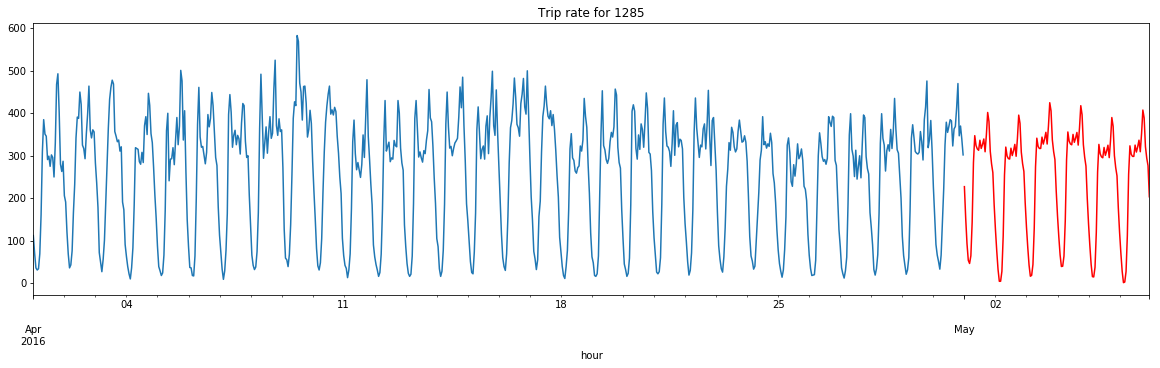

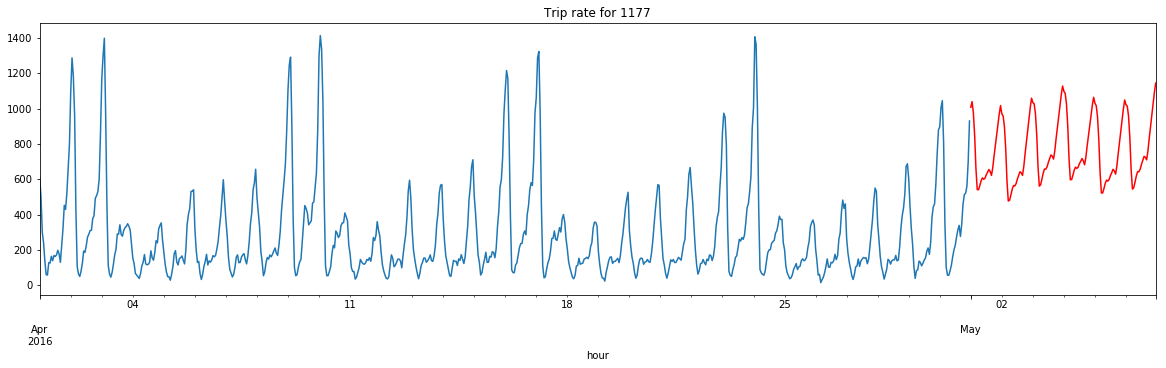

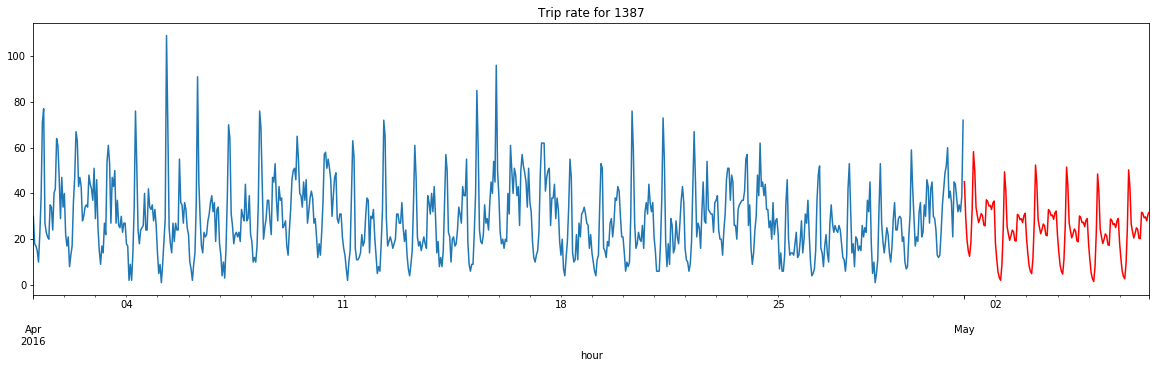

In [115]:
Future_predict(pivot)

In [55]:
time_range = pd.date_range(datetime.datetime(2016, 4, 30, 23), datetime.datetime(2016, 5, 31, 17), freq='H')
len(time_range)

739

In [56]:
print time_range[0], '-', time_range[1]

2016-04-30 23:00:00 - 2016-05-01 00:00:00


In [ ]:
%%time
Q_may = 0
R = len(reg.area.values)
for cell in reg.area.values:
    for time in time_range:
        n_kluster = clusters_dict[cell] # номер кластера
        area = central_area[n_kluster] # типичная ячейка для кластера
        param = best_param[area]
        
        model_fitted = sm.tsa.statespace.SARIMAX(pivot[cell], 
                                                order=(param[0], d, param[1]), 
                                                seasonal_order=(param[2], D, param[3], S)).filter(best_model[area].params)

        predicted_data = model_fitted.predict(time + relativedelta(hours=1), time + relativedelta(hours=6), dynamic=True)
        
        Q_may += (predicted_data - data_full.loc[predicted_data.index, area]).abs().sum()
# нормируем
Q_may /= R * len(time_range) * 6
print('Q_may =', Q_may)

# 6
** Прогноз на данных до Апреля **

# 7
** Прогноз на данных до Мая **